# Results

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [303]:
filepath = "./output/long_term_carbon_model/20230320-172424/summary_0320-1750.xlsx"
sheet_1 = "mean energy"
sheet_2 = "mean carbon"
energy_df = pd.read_excel(filepath, sheet_name = sheet_1)
carbon_df = pd.read_excel(filepath, sheet_name = sheet_2)

### Format Data

This following code:

- Create column for day number, hour number and total of all the carbon/energy values
- Split into data frames for each scenario (SDR, HDR)
- Make grouping the index

In [304]:
#Function to extract day number
def get_day(group):
    day = group.split("_")[1]
    return int(day)

def get_hour(group):
    hour = group.split("_")[3]
    return int(hour)

def total(df):
    total = df["Origin Datacentre"] + df["Content Delivery Network"] + df["Core Network"] + df["Access Network"] + df["TV"]
    return total    
#Make a cloumn for day and hour
energy_df["day"] = energy_df["group"].apply(get_day)
energy_df["hour"] = energy_df["group"].apply(get_hour)

carbon_df["day"] = carbon_df["group"].apply(get_day)
carbon_df["hour"] = carbon_df["group"].apply(get_hour)

#make total column
energy_df["total"] = total(energy_df)
carbon_df["total"] = total(carbon_df)

energy_df = energy_df[["Scenario","group","day","hour","Origin Datacentre","Content Delivery Network","Core Network","Access Network","TV","total"]]
carbon_df = carbon_df[["Scenario","group","day","hour","Origin Datacentre","Content Delivery Network","Core Network","Access Network","TV","total"]]

carbon_df

,Scenario,group,day,hour,Origin Datacentre,Content Delivery Network,Core Network,Access Network,TV,total
0,default,d_000_h_00,0,0,1661.309403,7183.886846,9242.046499,6459.501159,1.238903e+06,1.263450e+06
1,NaN,d_000_h_01,0,1,1088.826702,4706.133351,6052.281060,4221.555461,8.100558e+05,8.261246e+05
2,NaN,d_000_h_02,0,2,360.174558,1556.963095,2002.059422,1401.043457,2.687278e+05,2.740480e+05
3,NaN,d_000_h_03,0,3,249.493253,1079.219933,1387.238676,969.529878,1.858566e+05,1.895420e+05
4,NaN,d_000_h_04,0,4,215.710049,933.056808,1201.983662,839.211326,1.609437e+05,1.641337e+05
...,...,...,...,...,...,...,...,...,...,...
17515,NaN,d_364_h_19,364,19,1728.269676,7560.189991,9532.010600,6768.573429,1.751109e+06,1.776698e+06
17516,NaN,d_364_h_20,364,20,2554.145176,11180.035054,14091.887686,10011.841863,2.592697e+06,2.630535e+06
17517,NaN,d_364_h_21,364,21,3855.258748,16863.235708,21258.970888,15106.358760,3.912200e+06,3.969284e+06
17518,NaN,d_364_h_22,364,22,2836.255097,12410.117963,15631.516393,11115.557295,2.881052e+06,2.923045e+06


In [305]:
#Spilt SDR and HDR scenarios
split_index = energy_df.loc[energy_df["Scenario"] == "HDR"].index[0]
sdr_energy_df = energy_df[:split_index]  
hdr_energy_df = energy_df[split_index:]

sdr_carbon_df = carbon_df[:split_index]
hdr_carbon_df = carbon_df[split_index:]

#Make index group
sdr_energy_df = sdr_energy_df.reset_index()

hdr_energy_df = hdr_energy_df.reset_index()

sdr_carbon_df = sdr_carbon_df.reset_index()
hdr_carbon_df = hdr_carbon_df.reset_index()


#Drop scenario colum
sdr_energy_df = sdr_energy_df.drop(columns = ["Scenario","index"])
hdr_energy_df = hdr_energy_df.drop(columns = ["Scenario","index"])

sdr_carbon_df = sdr_carbon_df.drop(columns = ["Scenario","index"])
hdr_carbon_df = hdr_carbon_df.drop(columns = ["Scenario","index"])

hdr_carbon_df

,group,day,hour,Origin Datacentre,Content Delivery Network,Core Network,Access Network,TV,total
0,d_000_h_00,0,0,892.752038,3906.082553,4921.305150,3495.692424,9.066052e+05,9.198210e+05
1,d_000_h_01,0,1,595.190306,2604.724048,3281.387650,2335.169320,6.046374e+05,6.134538e+05
2,d_000_h_02,0,2,193.810596,848.330619,1069.776143,760.150472,1.966746e+05,1.995466e+05
3,d_000_h_03,0,3,131.544106,575.311884,725.107867,515.160536,1.335398e+05,1.354869e+05
4,d_000_h_04,0,4,113.860788,498.361931,628.119040,446.371244,1.155099e+05,1.171967e+05
...,...,...,...,...,...,...,...,...,...
8755,d_364_h_19,364,19,1728.269676,7560.189991,9532.010600,6768.573429,1.751109e+06,1.776698e+06
8756,d_364_h_20,364,20,2554.145176,11180.035054,14091.887686,10011.841863,2.592697e+06,2.630535e+06
8757,d_364_h_21,364,21,3855.258748,16863.235708,21258.970888,15106.358760,3.912200e+06,3.969284e+06
8758,d_364_h_22,364,22,2836.255097,12410.117963,15631.516393,11115.557295,2.881052e+06,2.923045e+06


## Plots 

- Raw plots
- Average plots
- Normalised plots
- Standardised plots

### Raw Plots

In [315]:
def plot_raw(x,y_list,x_label,y_label,title):
    fig, ax = plt.subplots(figsize=(25, 10))
    for y in y_list:
        ax.plot(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend(range(len(y_list)))
    plt.show()


## Average 

Plot based on daily average 

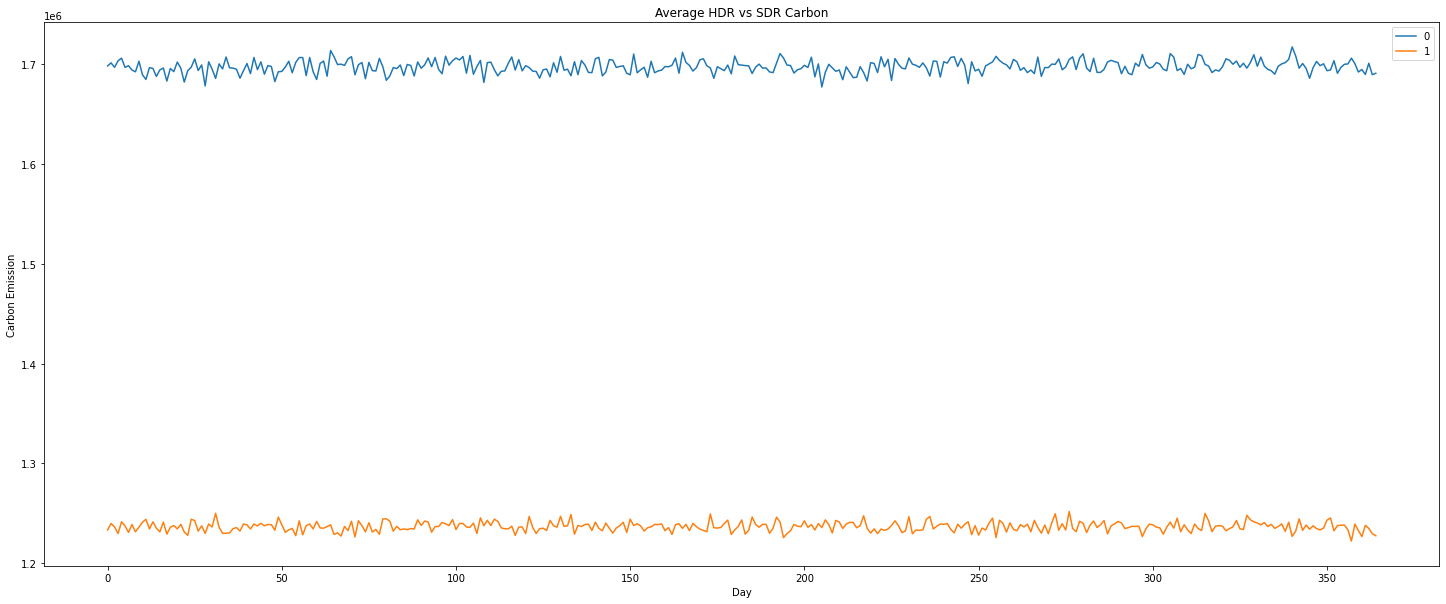

In [316]:
def get_average_df(df):
    new_df = df.groupby(["day"]).mean()
    new_df = new_df.reset_index()
    new_df = new_df.drop(columns="hour")
    return new_df

#HDR Carbon 
df_hdr_c = get_average_df(hdr_carbon_df)
df_list = [df_hdr_c["Origin Datacentre"],
           df_hdr_c["Content Delivery Network"],
           df_hdr_c["Core Network"],
           df_hdr_c["Access Network"],
           df_hdr_c["TV"]]

#SDR Carbon 
df_sdr_c = get_average_df(sdr_carbon_df)
df_list = [df_sdr_c["Origin Datacentre"],
           df_sdr_c["Content Delivery Network"],
           df_sdr_c["Core Network"],
           df_sdr_c["Access Network"],
           df_sdr_c["TV"]]

plot_raw(df_sdr_c.index,[df_sdr_c["total"], df_hdr_c["total"]], "Day", "Carbon Emission","Average HDR vs SDR Carbon")


## Normalisation and standardisation

In [357]:
def log(df):
    df = df.apply(np.log)
    df = df.mean()
    return df

def min_max(df):
    df = (df.mean() - df.min()) / (df.max() - df.min())        
    return df

#def cut(year_mean)

#def clip(df):
#    year_mean = df.mean()
#    day_mean = df.groupby(["day"]).apply()
#    if 
def standardization(df):
    new_df = (df - df.mean())/df.std()
    return new_df

def get_new_df(df):
    df = df.drop(columns="group")
    new_df = df.groupby(["day"]).apply(min_max)
    return new_df    

### Carbon

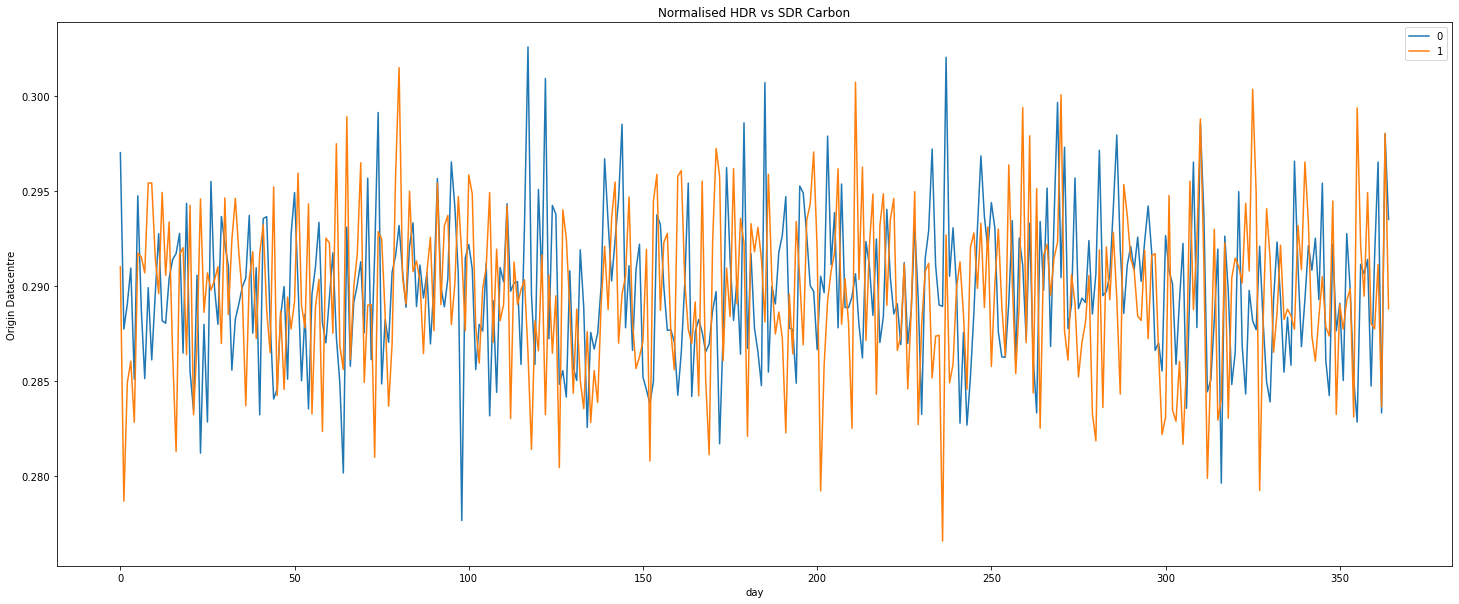

In [358]:
#HDR Carbon 
df_hdr_c = get_new_df(hdr_carbon_df)
df_list = [df_hdr_c["Origin Datacentre"],
           df_hdr_c["Content Delivery Network"],
           df_hdr_c["Core Network"],
           df_hdr_c["Access Network"],
           df_hdr_c["TV"]]

#SDR Carbon 
df_sdr_c = get_new_df(sdr_carbon_df)
df_list = [df_sdr_c["Origin Datacentre"],
           df_sdr_c["Content Delivery Network"],
           df_sdr_c["Core Network"],
           df_sdr_c["Access Network"],
           df_sdr_c["TV"]]

plot_raw(df_sdr_c.index,[df_sdr_c["total"], df_hdr_c["total"]], "day", "Origin Datacentre","Normalised HDR vs SDR Carbon")

### Energy

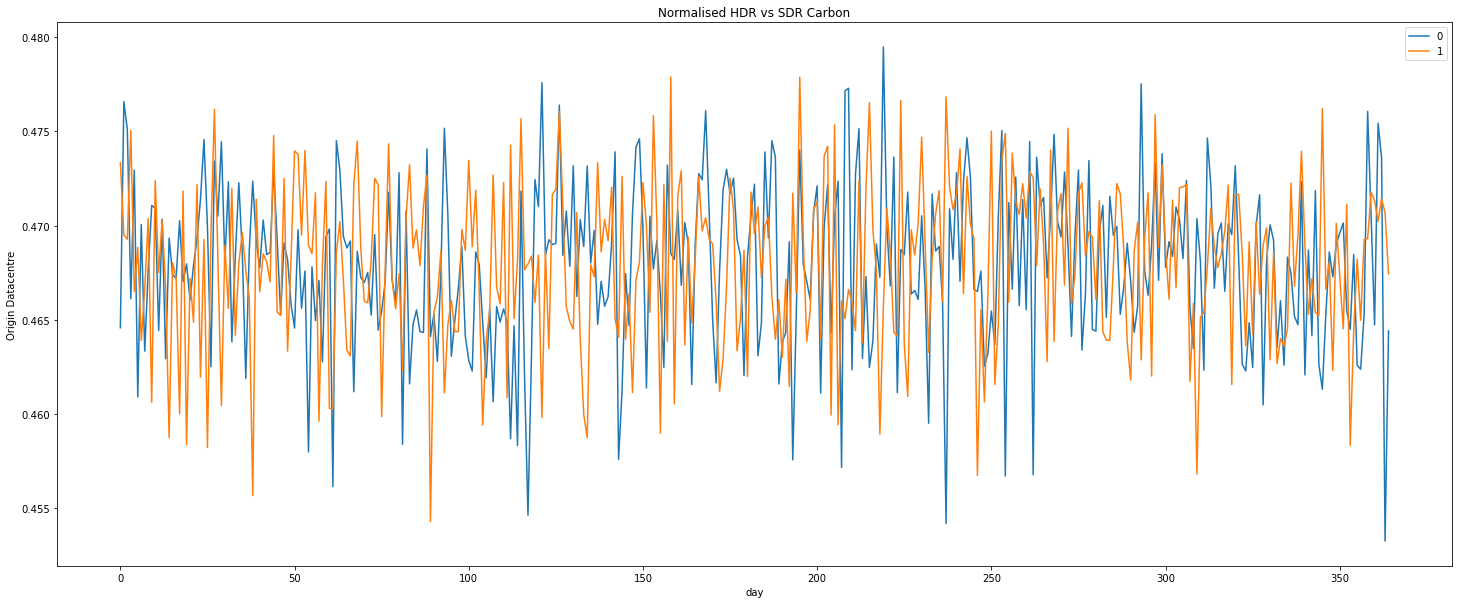

In [359]:
#HDR Energy
df_hdr_e = get_new_df(hdr_energy_df)
df_list = [df_hdr_e["Origin Datacentre"],
           df_hdr_e["Content Delivery Network"],
           df_hdr_e["Core Network"],
           df_hdr_e["Access Network"],
           df_hdr_e["TV"]]

#SDR Energy
df_sdr_e = get_new_df(sdr_energy_df)
df_list = [df_sdr_e["Origin Datacentre"],
           df_sdr_e["Content Delivery Network"],
           df_sdr_e["Core Network"],
           df_sdr_e["Access Network"],
           df_sdr_e["TV"]]

plot_raw(df_sdr_c.index,[df_sdr_e["total"], df_hdr_e["total"]], "day", "Origin Datacentre","Normalised HDR vs SDR Carbon")